# Systematic Risk, Beta Factor and the CAPM Model

__Objectives:__

1. Find out how to calculate Beta 
   - Find out if Beta is stable over time
   - Find out how Beta affects CAPM model
2. Find out amount of diversifiable risk  for each stock
   - Compare systematic vs unsystematic risk for each stock
   


__Key Learnings__:
- In a diversified Portfolio, parts of a stock´s total risk can be eliminated.  (unsystematic/diversifiable risk) 
- In a diversified Portfolio, parts of a stock´s total risk can´t be eliminated (systematic risk)
- Investors shouldn´t care about a stock´s diversifiable risk.
- Stock investors should only get compensated for taking systematic/market risk. 
- For single stocks, the relationship between market risk and return should be more meaningful (CAPM model)
- Motivation: CAPM can be helpful to measure and assess single Stock Performance (Benchmarking) (ex post)


In a diversified Portfolio (MP):
- only a Stock´s systematic Risk (cov with MP, "Market Risk") contributes to the Total Portfolio Risk!
- a Stock´s unsystematic Risk can be eliminated!


 - Market Risk (systematic Risk)__: global economy, market or industry/segment-specific risk factors that apply to many companies.
 - Unsystematic Risk__: company-specific risk-factors (e.g. management) -> "Elon Musk Risk"


- most of the stocks with the exception of WMT APPL and MSFT have higher unsystembatic risk that cannot be diversified. This is especially so for tesla, likely due to Elon Musk's comments that swing prices drastically.

## Getting started

In [4]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.6f}'.format
import matplotlib.pyplot as plt
import yfinance as yf

start = '2019-09-09'
end = '2024-09-09'
symbol = ['AAPL', 'BA', 'TSLA', 'WMT', 'MSFT', 'JPM', 'DIS', 'GE']
prices = yf.download(symbol, start, end ).Close
prices

[*********************100%%**********************]  8 of 8 completed


Ticker,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT
Date,,,,,,,,
2019-09-09,53.542500,358.779999,138.830002,44.657848,115.400002,137.520004,15.452667,38.776669
2019-09-10,54.174999,369.489990,135.789993,45.554993,116.870003,136.080002,15.702667,38.683334
2019-09-11,55.897499,382.940002,136.190002,46.651501,117.190002,136.119995,16.473333,38.673332
2019-09-12,55.772499,375.630005,137.500000,46.153088,117.910004,137.520004,16.391333,38.973331
2019-09-13,54.687500,379.760010,138.020004,46.551819,120.230003,137.320007,16.346666,39.143333
...,...,...,...,...,...,...,...,...
2024-08-30,229.000000,173.740005,90.379997,174.619995,224.800003,417.140015,214.110001,77.230003
2024-09-03,222.770004,161.020004,89.129997,164.210007,220.300003,409.440002,210.600006,77.169998
2024-09-04,220.850006,163.220001,89.250000,166.360001,219.330002,408.899994,219.410004,77.239998


In [7]:
returns = prices.pct_change().dropna() 
returns

Ticker,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT
Date,,,,,,,,
2019-09-10,0.011813,0.029851,-0.021897,0.020089,0.012738,-0.010471,0.016178,-0.002407
2019-09-11,0.031795,0.036402,0.002946,0.024070,0.002738,0.000294,0.049079,-0.000259
2019-09-12,-0.002236,-0.019089,0.009619,-0.010684,0.006144,0.010285,-0.004978,0.007757
2019-09-13,-0.019454,0.010995,0.003782,0.008639,0.019676,-0.001454,-0.002725,0.004362
2019-09-16,0.005257,-0.002396,-0.016085,0.004283,-0.008900,-0.007209,-0.009747,-0.015839
...,...,...,...,...,...,...,...,...
2024-08-30,-0.003438,0.008592,0.006347,0.005991,0.011656,0.009731,0.037958,0.010599
2024-09-03,-0.027205,-0.073213,-0.013830,-0.059615,-0.020018,-0.018459,-0.016393,-0.000777
2024-09-04,-0.008619,0.013663,0.001346,0.013093,-0.004403,-0.001319,0.041833,0.000907


## Portfolio Optimization (Optimizing the past)

Goal: Get the Market Portfolio (ex post)

In [14]:
import scipy.optimize as sco
pd.options.display.float_format = '{:.4f}'.format
np.set_printoptions(suppress = True)

In [15]:
rf = 0.03

In [16]:
returns 

Ticker,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT
Date,,,,,,,,
2019-09-10,0.0118,0.0299,-0.0219,0.0201,0.0127,-0.0105,0.0162,-0.0024
2019-09-11,0.0318,0.0364,0.0029,0.0241,0.0027,0.0003,0.0491,-0.0003
2019-09-12,-0.0022,-0.0191,0.0096,-0.0107,0.0061,0.0103,-0.0050,0.0078
2019-09-13,-0.0195,0.0110,0.0038,0.0086,0.0197,-0.0015,-0.0027,0.0044
2019-09-16,0.0053,-0.0024,-0.0161,0.0043,-0.0089,-0.0072,-0.0097,-0.0158
...,...,...,...,...,...,...,...,...
2024-08-30,-0.0034,0.0086,0.0063,0.0060,0.0117,0.0097,0.0380,0.0106
2024-09-03,-0.0272,-0.0732,-0.0138,-0.0596,-0.0200,-0.0185,-0.0164,-0.0008
2024-09-04,-0.0086,0.0137,0.0013,0.0131,-0.0044,-0.0013,0.0418,0.0009


In [19]:
# exception: use mean of simple returns (linearity)
def port_ret(weights):
    simple_ret = returns.dot(weights.T)
    return simple_ret.mean() * 252

In [22]:
#calculate annualized portfolio volatility (based on weights)
def port_vol(weights):
    simple_ret = returns.dot(weights.T)
    return simple_ret.std() * np.sqrt(252)

In [24]:
#define function to be minimized (sco only supports minimize, not maximize)
def sharpe(weights): 
     return -(port_ret(weights) - rf) / port_vol(weights) 

In [26]:
#number of assets
noa = len(returns.columns)
noa

8

In [28]:
#equal weights (starting point of optimization)
eweigths = np.full(noa, 1/noa)
eweigths

array([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125])

In [30]:
#constraint: weights must sum up to 1 -> sum of weights - 1 = 0
cons = ({"type": "eq", "fun": lambda x: np.sum(x) - 1})

In [32]:
#bounds: all weights shall be between 0 and 1 -> can be changed
bnds =  tuple((0, 1) for x in range(noa))
bnds

((0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1))

In [34]:
#run optimization based on function to be minimized, starting with equal weights and based on respective bounds and constraints
opts = sco.minimize(sharpe, eweigths, method = "SLSQP", bounds = bnds, constraints= cons)

In [36]:
#output of optimization
opts

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -1.281930296706642
       x: [ 2.195e-01  6.654e-16  3.597e-16  2.363e-01  0.000e+00
            0.000e+00  2.629e-01  2.813e-01]
     nit: 11
     jac: [-1.056e-01  1.355e+00  9.152e-01 -1.061e-01  1.565e-01
           -9.122e-03 -1.050e-01 -1.067e-01]
    nfev: 103
    njev: 11

In [38]:
#getting the optimal weights
optimal_weights = opts["x"]
optimal_weights

array([0.21952956, 0.        , 0.        , 0.23628053, 0.        ,
       0.        , 0.26290943, 0.28128048])

In [40]:
optimal_weights = pd.Series(data = optimal_weights, index = returns.columns).sort_values(ascending = False)
optimal_weights

Ticker
WMT    0.2813
TSLA   0.2629
GE     0.2363
AAPL   0.2195
BA     0.0000
DIS    0.0000
JPM    0.0000
MSFT   0.0000
dtype: float64

In [42]:
returns["MP"] =  returns.dot(optimal_weights.T)
returns

Ticker,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT,MP
Date,,,,,,,,,
2019-09-10,0.0118,0.0299,-0.0219,0.0201,0.0127,-0.0105,0.0162,-0.0024,0.0109
2019-09-11,0.0318,0.0364,0.0029,0.0241,0.0027,0.0003,0.0491,-0.0003,0.0255
2019-09-12,-0.0022,-0.0191,0.0096,-0.0107,0.0061,0.0103,-0.0050,0.0078,-0.0021
2019-09-13,-0.0195,0.0110,0.0038,0.0086,0.0197,-0.0015,-0.0027,0.0044,-0.0017
2019-09-16,0.0053,-0.0024,-0.0161,0.0043,-0.0089,-0.0072,-0.0097,-0.0158,-0.0049
...,...,...,...,...,...,...,...,...,...
2024-08-30,-0.0034,0.0086,0.0063,0.0060,0.0117,0.0097,0.0380,0.0106,0.0136
2024-09-03,-0.0272,-0.0732,-0.0138,-0.0596,-0.0200,-0.0185,-0.0164,-0.0008,-0.0246
2024-09-04,-0.0086,0.0137,0.0013,0.0131,-0.0044,-0.0013,0.0418,0.0009,0.0125


In [44]:
def ann_risk_return(returns_df): # assumes simple returns as input
    summary = pd.DataFrame(index = returns_df.columns)
    summary["ann. Risk"] = returns_df.std() * np.sqrt(252)
    summary["ann. Return"] = returns_df.mean() * 252 # mean of simple returns
    return summary

In [46]:
summary = ann_risk_return(returns)
summary

,ann. Risk,ann. Return
Ticker,,
AAPL,0.3171,0.3344
BA,0.5097,-0.0348
DIS,0.3395,-0.0340
GE,0.3968,0.3361
JPM,0.3197,0.1733
MSFT,0.3029,0.2609
TSLA,0.6585,0.7406
WMT,0.2229,0.1615
MP,0.2831,0.3929


In [48]:
summary["Sharpe"] = (summary["ann. Return"] - rf) / summary["ann. Risk"]
summary

,ann. Risk,ann. Return,Sharpe
Ticker,,,
AAPL,0.3171,0.3344,0.9600
BA,0.5097,-0.0348,-0.1271
DIS,0.3395,-0.0340,-0.1886
GE,0.3968,0.3361,0.7716
JPM,0.3197,0.1733,0.4484
MSFT,0.3029,0.2609,0.7621
TSLA,0.6585,0.7406,1.0790
WMT,0.2229,0.1615,0.5897
MP,0.2831,0.3929,1.2819


## Systematic and Unsystematic Risk

In [52]:
summary["TotalRisk_var"] = summary["ann. Risk"]**2 # variance
summary

,ann. Risk,ann. Return,Sharpe,TotalRisk_var
Ticker,,,,
AAPL,0.3171,0.3344,0.9600,0.1005
BA,0.5097,-0.0348,-0.1271,0.2598
DIS,0.3395,-0.0340,-0.1886,0.1153
GE,0.3968,0.3361,0.7716,0.1574
JPM,0.3197,0.1733,0.4484,0.1022
MSFT,0.3029,0.2609,0.7621,0.0918
TSLA,0.6585,0.7406,1.0790,0.4337
WMT,0.2229,0.1615,0.5897,0.0497
MP,0.2831,0.3929,1.2819,0.0802


In [54]:
cov_matrix = returns.cov() * 252
cov_matrix

Ticker,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT,MP
Ticker,,,,,,,,,
AAPL,0.1005,0.0658,0.0477,0.0461,0.0430,0.0718,0.1024,0.0261,0.0672
BA,0.0658,0.2598,0.0881,0.1245,0.0954,0.0570,0.1075,0.0178,0.0771
DIS,0.0477,0.0881,0.1153,0.0650,0.0616,0.0490,0.0716,0.0182,0.0498
GE,0.0461,0.1245,0.0650,0.1574,0.0797,0.0439,0.0607,0.0154,0.0676
JPM,0.0430,0.0954,0.0616,0.0797,0.1022,0.0417,0.0561,0.0180,0.0481
MSFT,0.0718,0.0570,0.0490,0.0439,0.0417,0.0918,0.0898,0.0259,0.0570
TSLA,0.1024,0.1075,0.0716,0.0607,0.0561,0.0898,0.4337,0.0217,0.1569
WMT,0.0261,0.0178,0.0182,0.0154,0.0180,0.0259,0.0217,0.0497,0.0290
MP,0.0672,0.0771,0.0498,0.0676,0.0481,0.0570,0.1569,0.0290,0.0802


__Weighted average covariance of constituents with Market Portfolio__

In [247]:
cov_matrix.iloc[:-1,-1].dot(optimal_weights)

0.04809838110882491

__Total Risk of Market Portfolio__

In [60]:
cov_matrix.iloc[-1, -1]

0.08015944593127264

In [64]:
summary["SystRisk_var"] = cov_matrix.iloc[:, -1]
summary

,ann. Risk,ann. Return,Sharpe,TotalRisk_var,SystRisk_var
Ticker,,,,,
AAPL,0.3171,0.3344,0.9600,0.1005,0.0672
BA,0.5097,-0.0348,-0.1271,0.2598,0.0771
DIS,0.3395,-0.0340,-0.1886,0.1153,0.0498
GE,0.3968,0.3361,0.7716,0.1574,0.0676
JPM,0.3197,0.1733,0.4484,0.1022,0.0481
MSFT,0.3029,0.2609,0.7621,0.0918,0.0570
TSLA,0.6585,0.7406,1.0790,0.4337,0.1569
WMT,0.2229,0.1615,0.5897,0.0497,0.0290
MP,0.2831,0.3929,1.2819,0.0802,0.0802


In [66]:
summary["UnsystRisk_var"] = summary["TotalRisk_var"].sub(summary["SystRisk_var"]) #covariance with the market portfolio indicates how much the stock moves with the market. Therefore, the greater the covariance with the market, the greater the systemic risk.
summary

,ann. Risk,ann. Return,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var
Ticker,,,,,,
AAPL,0.3171,0.3344,0.9600,0.1005,0.0672,0.0333
BA,0.5097,-0.0348,-0.1271,0.2598,0.0771,0.1827
DIS,0.3395,-0.0340,-0.1886,0.1153,0.0498,0.0655
GE,0.3968,0.3361,0.7716,0.1574,0.0676,0.0898
JPM,0.3197,0.1733,0.4484,0.1022,0.0481,0.0541
MSFT,0.3029,0.2609,0.7621,0.0918,0.0570,0.0347
TSLA,0.6585,0.7406,1.0790,0.4337,0.1569,0.2767
WMT,0.2229,0.1615,0.5897,0.0497,0.0290,0.0207
MP,0.2831,0.3929,1.2819,0.0802,0.0802,-0.0000


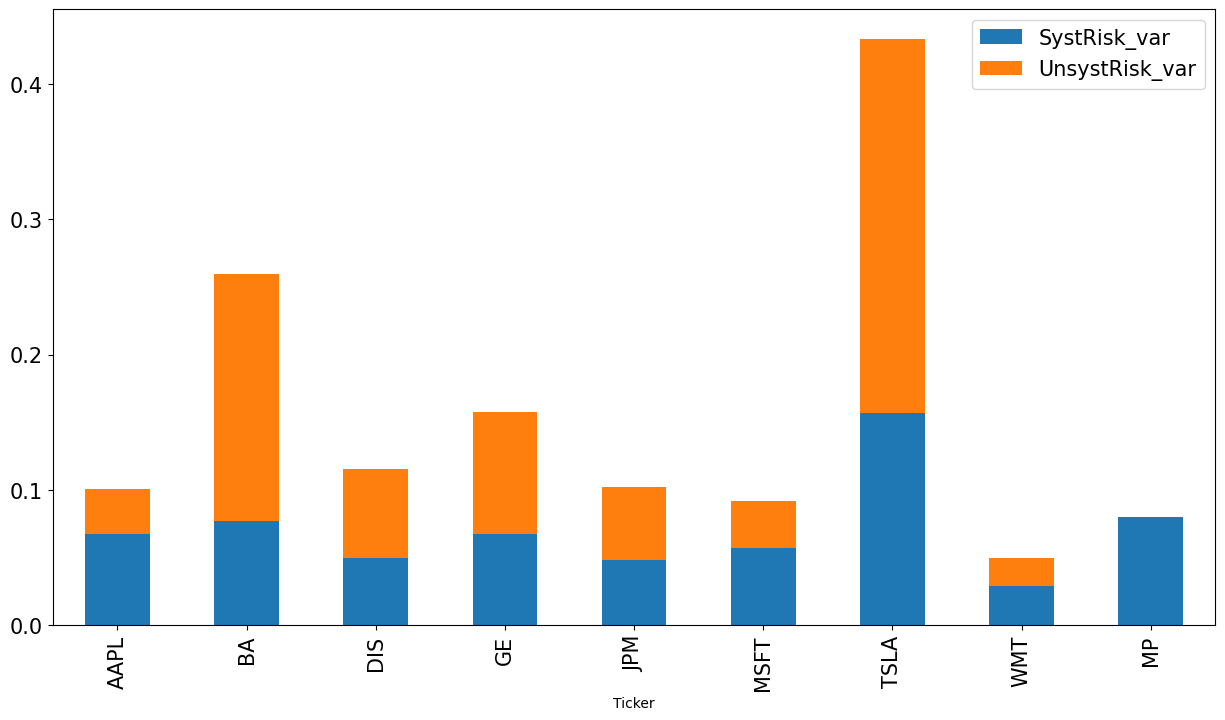

In [68]:
summary.iloc[:, 4:].plot(kind = "bar", stacked = True, figsize= (15, 8), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [72]:
rf = [0.03, 0] # 3% return, zero Risk

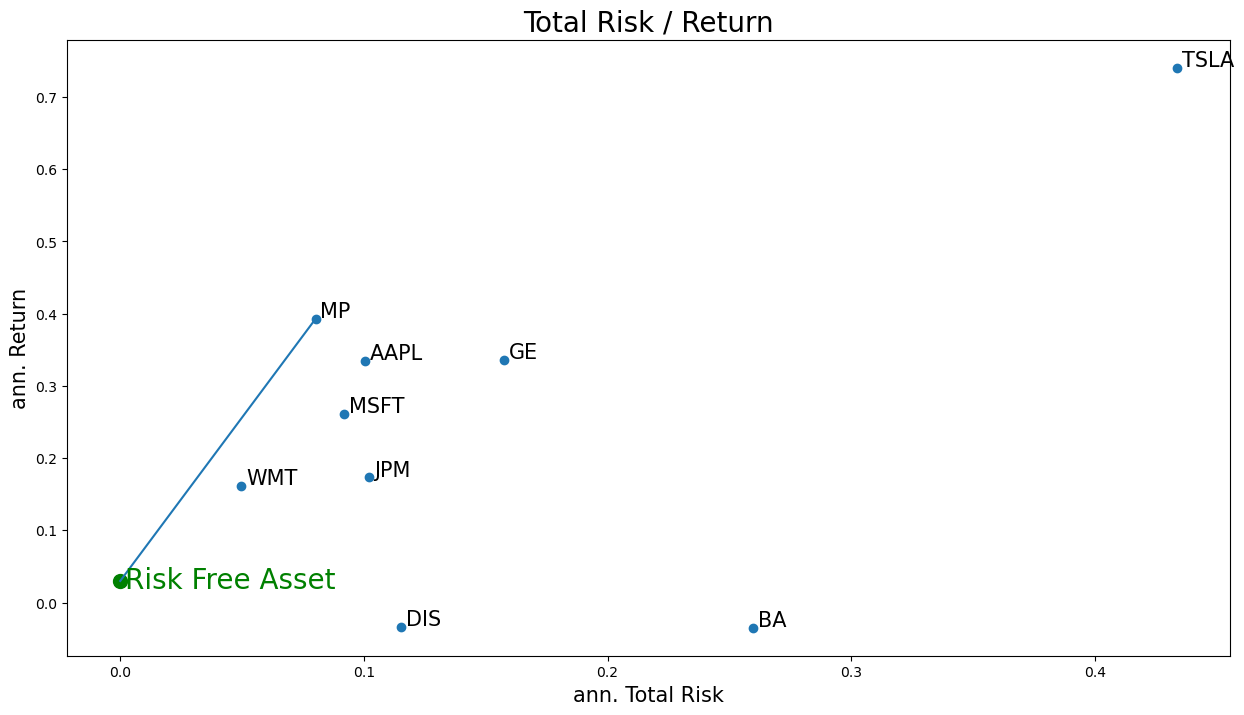

In [75]:
plt.figure(figsize = (15, 8))
plt.scatter(summary.TotalRisk_var, summary["ann. Return"])
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "TotalRisk_var"]+0.002, summary.loc[i, "ann. Return"]+0.002), size = 15)
plt.plot([rf[1], summary.loc["MP", "TotalRisk_var"]], [rf[0], summary.loc["MP", "ann. Return"]])
plt.scatter(rf[1], rf[0], s = 100, marker = "o", c = "green")
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.002, rf[0] - 0.01), size = 20, color = "green")
plt.xlabel("ann. Total Risk", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Total Risk / Return", fontsize = 20)
plt.show()

-> ...or only __systematic Risk__?

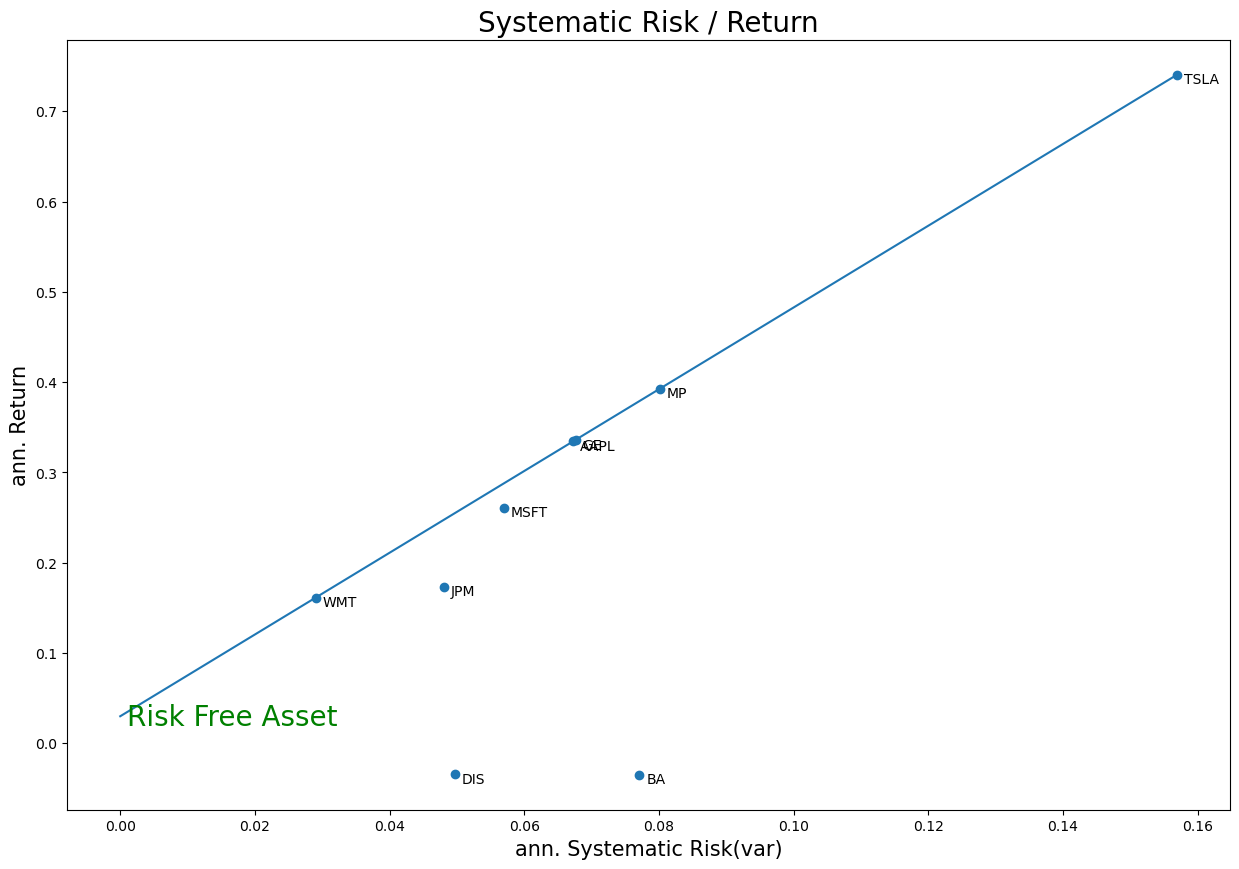

In [78]:
plt.figure(figsize = (15, 10))
plt.scatter(summary.SystRisk_var, summary["ann. Return"])
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "SystRisk_var"]+0.001, summary.loc[i, "ann. Return"]-0.01), size = 10)
plt.plot([rf[1], summary.loc["TSLA", "SystRisk_var"]], [rf[0], summary.loc["TSLA", "ann. Return"]])
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.001, rf[0] - 0.01), size = 20, color = "green")
plt.xlabel("ann. Systematic Risk(var)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Systematic Risk / Return", fontsize = 20)
plt.show()

In [79]:
optimal_weights

Ticker
WMT    0.2813
TSLA   0.2629
GE     0.2363
AAPL   0.2195
BA     0.0000
DIS    0.0000
JPM    0.0000
MSFT   0.0000
dtype: float64

- WMT, MSFT, AAPL and TSLA __fairly compensate Investors for taking Market Risk__.  
- JPM, DIS, BA and GE are not in the MP, because they __underperform in terms of (systemtic) Risk-adjusted Return__.

### CAPM & the Security Market Line

In [85]:
summary

,ann. Risk,ann. Return,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var
Ticker,,,,,,
AAPL,0.3171,0.3344,0.9600,0.1005,0.0672,0.0333
BA,0.5097,-0.0348,-0.1271,0.2598,0.0771,0.1827
DIS,0.3395,-0.0340,-0.1886,0.1153,0.0498,0.0655
GE,0.3968,0.3361,0.7716,0.1574,0.0676,0.0898
JPM,0.3197,0.1733,0.4484,0.1022,0.0481,0.0541
MSFT,0.3029,0.2609,0.7621,0.0918,0.0570,0.0347
TSLA,0.6585,0.7406,1.0790,0.4337,0.1569,0.2767
WMT,0.2229,0.1615,0.5897,0.0497,0.0290,0.0207
MP,0.2831,0.3929,1.2819,0.0802,0.0802,-0.0000


__Normalize Systematic Risk (divide by Total Market Risk)__ -> __beta factor__

In [88]:
summary["beta"] = summary.SystRisk_var / summary.loc["MP", "TotalRisk_var"]

In [90]:
summary

,ann. Risk,ann. Return,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var,beta
Ticker,,,,,,,
AAPL,0.3171,0.3344,0.9600,0.1005,0.0672,0.0333,0.8386
BA,0.5097,-0.0348,-0.1271,0.2598,0.0771,0.1827,0.9619
DIS,0.3395,-0.0340,-0.1886,0.1153,0.0498,0.0655,0.6208
GE,0.3968,0.3361,0.7716,0.1574,0.0676,0.0898,0.8434
JPM,0.3197,0.1733,0.4484,0.1022,0.0481,0.0541,0.5999
MSFT,0.3029,0.2609,0.7621,0.0918,0.0570,0.0347,0.7116
TSLA,0.6585,0.7406,1.0790,0.4337,0.1569,0.2767,1.9578
WMT,0.2229,0.1615,0.5897,0.0497,0.0290,0.0207,0.3622
MP,0.2831,0.3929,1.2819,0.0802,0.0802,-0.0000,1.0000


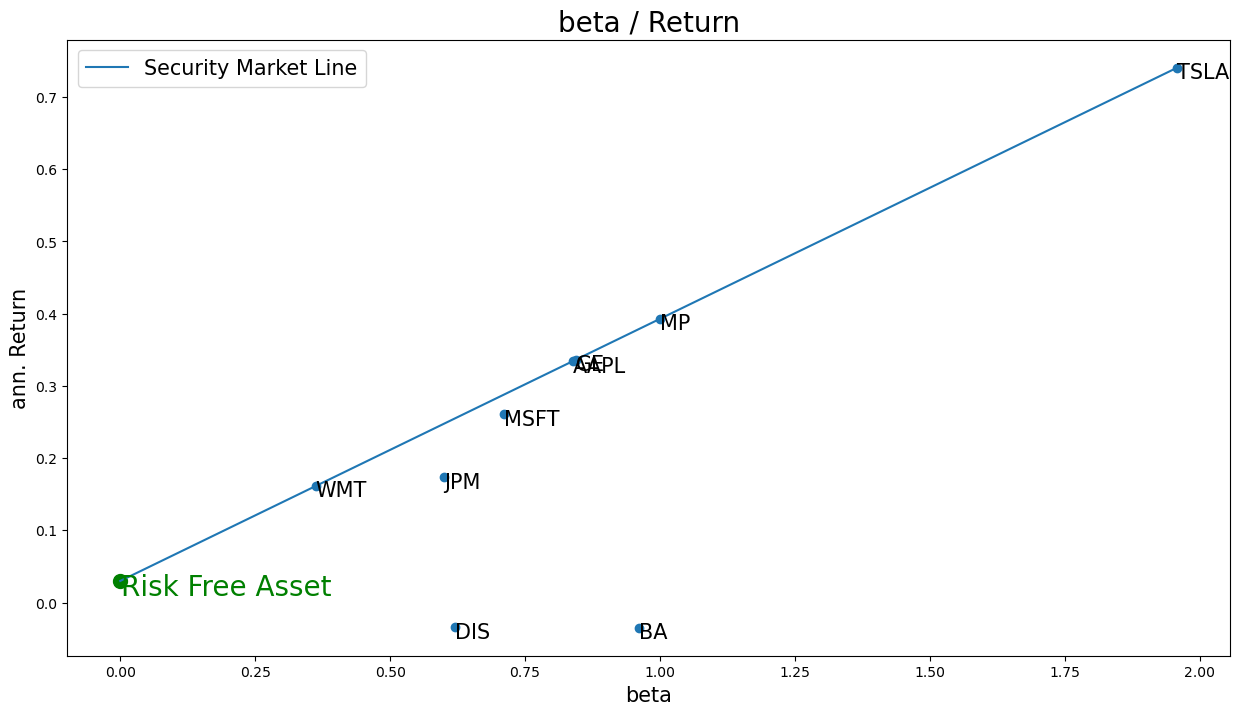

In [92]:
plt.figure(figsize = (15, 8))
plt.scatter(summary.beta, summary["ann. Return"])
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "beta"]+0.00, summary.loc[i, "ann. Return"]-0.015), size = 15)
plt.plot([rf[1], summary.loc["TSLA", "beta"]], [rf[0], summary.loc["TSLA", "ann. Return"]], label = "Security Market Line")
plt.scatter(rf[1], rf[0], s = 100, marker = "o", c = "green")
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.002, rf[0] - 0.02), size = 20, color = "green")
plt.xlabel("beta", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("beta / Return", fontsize = 20)
plt.legend(fontsize = 15)
plt.show()

__Capital Asset Pricing Model (CAPM) Formula!__

In [99]:
summary["capm_ret"] = rf[0] + (summary.loc["MP", "ann. Return"] - rf[0]) * summary.beta

In [101]:
summary

,ann. Risk,ann. Return,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var,beta,capm_ret
Ticker,,,,,,,,
AAPL,0.3171,0.3344,0.9600,0.1005,0.0672,0.0333,0.8386,0.3344
BA,0.5097,-0.0348,-0.1271,0.2598,0.0771,0.1827,0.9619,0.3791
DIS,0.3395,-0.0340,-0.1886,0.1153,0.0498,0.0655,0.6208,0.2553
GE,0.3968,0.3361,0.7716,0.1574,0.0676,0.0898,0.8434,0.3361
JPM,0.3197,0.1733,0.4484,0.1022,0.0481,0.0541,0.5999,0.2477
MSFT,0.3029,0.2609,0.7621,0.0918,0.0570,0.0347,0.7116,0.2883
TSLA,0.6585,0.7406,1.0790,0.4337,0.1569,0.2767,1.9578,0.7406
WMT,0.2229,0.1615,0.5897,0.0497,0.0290,0.0207,0.3622,0.1615
MP,0.2831,0.3929,1.2819,0.0802,0.0802,-0.0000,1.0000,0.3929


## Beta and Alpha

In [250]:
summary["alpha"] = summary["ann. Return"] - summary.capm_ret
summary

,ann. Risk,ann. Return,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var,beta,capm_ret,alpha
Ticker,,,,,,,,,
AAPL,0.3172,0.3361,0.9650,0.1006,0.0534,0.0472,1.1846,0.1673,0.1688
BA,0.5098,-0.0292,-0.1161,0.2599,0.0657,0.1942,1.4564,0.1988,-0.2280
DIS,0.3397,-0.0325,-0.1839,0.1154,0.0471,0.0683,1.0446,0.1510,-0.1835
GE,0.3968,0.3396,0.7802,0.1575,0.0516,0.1058,1.1448,0.1627,0.1770
JPM,0.3197,0.1783,0.4638,0.1022,0.0487,0.0535,1.0803,0.1552,0.0231
MSFT,0.3029,0.2644,0.7736,0.0918,0.0530,0.0388,1.1747,0.1661,0.0982
TSLA,0.6576,0.7581,1.1072,0.4325,0.0693,0.3632,1.5365,0.2080,0.5501
WMT,0.2230,0.1624,0.5938,0.0497,0.0211,0.0286,0.4687,0.0843,0.0781
MP,0.2124,0.1459,0.5456,0.0451,0.0451,-0.0000,1.0000,0.1459,0.0000


## Using a more suitable Market Portfolio

In [118]:
prices

Ticker,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT
Date,,,,,,,,
2019-09-09,53.5425,358.7800,138.8300,44.6578,115.4000,137.5200,15.4527,38.7767
2019-09-10,54.1750,369.4900,135.7900,45.5550,116.8700,136.0800,15.7027,38.6833
2019-09-11,55.8975,382.9400,136.1900,46.6515,117.1900,136.1200,16.4733,38.6733
2019-09-12,55.7725,375.6300,137.5000,46.1531,117.9100,137.5200,16.3913,38.9733
2019-09-13,54.6875,379.7600,138.0200,46.5518,120.2300,137.3200,16.3467,39.1433
...,...,...,...,...,...,...,...,...
2024-08-30,229.0000,173.7400,90.3800,174.6200,224.8000,417.1400,214.1100,77.2300
2024-09-03,222.7700,161.0200,89.1300,164.2100,220.3000,409.4400,210.6000,77.1700
2024-09-04,220.8500,163.2200,89.2500,166.3600,219.3300,408.9000,219.4100,77.2400


In [120]:
returns

Ticker,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT,MP
Date,,,,,,,,,
2019-09-10,0.0118,0.0299,-0.0219,0.0201,0.0127,-0.0105,0.0162,-0.0024,0.0109
2019-09-11,0.0318,0.0364,0.0029,0.0241,0.0027,0.0003,0.0491,-0.0003,0.0255
2019-09-12,-0.0022,-0.0191,0.0096,-0.0107,0.0061,0.0103,-0.0050,0.0078,-0.0021
2019-09-13,-0.0195,0.0110,0.0038,0.0086,0.0197,-0.0015,-0.0027,0.0044,-0.0017
2019-09-16,0.0053,-0.0024,-0.0161,0.0043,-0.0089,-0.0072,-0.0097,-0.0158,-0.0049
...,...,...,...,...,...,...,...,...,...
2024-08-30,-0.0034,0.0086,0.0063,0.0060,0.0117,0.0097,0.0380,0.0106,0.0136
2024-09-03,-0.0272,-0.0732,-0.0138,-0.0596,-0.0200,-0.0185,-0.0164,-0.0008,-0.0246
2024-09-04,-0.0086,0.0137,0.0013,0.0131,-0.0044,-0.0013,0.0418,0.0009,0.0125


In [122]:
start = prices.index[0]
end = prices.index[-1]

In [124]:
import yfinance as yf

__approximation for Market Portfolio: S&P 500 Index (US Stocks)__

In [127]:
market = yf.download("^GSPC", start = start, end = end, ignore_tz = True)
market

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-09-09,2988.4299,2989.4299,2969.3899,2978.4299,2978.4299,4031120000
2019-09-10,2971.0100,2979.3899,2957.0100,2979.3899,2979.3899,4393040000
2019-09-11,2981.4099,3000.9299,2975.3101,3000.9299,3000.9299,3934370000
2019-09-12,3009.0801,3020.7400,3000.9199,3009.5701,3009.5701,3796990000
2019-09-13,3012.2100,3017.3301,3002.8999,3007.3899,3007.3899,3557010000
...,...,...,...,...,...,...
2024-08-29,5607.2998,5646.9502,5583.7100,5591.9600,5591.9600,3065640000
2024-08-30,5612.7402,5651.3701,5581.7900,5648.3999,5648.3999,4185850000
2024-09-03,5623.8901,5623.8901,5504.3301,5528.9302,5528.9302,3866350000


In [128]:
returns["MP"] = market.Close.pct_change()
returns.dropna(inplace = True)
returns

Ticker,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT,MP
Date,,,,,,,,,
2019-09-10,0.0118,0.0299,-0.0219,0.0201,0.0127,-0.0105,0.0162,-0.0024,0.0003
2019-09-11,0.0318,0.0364,0.0029,0.0241,0.0027,0.0003,0.0491,-0.0003,0.0072
2019-09-12,-0.0022,-0.0191,0.0096,-0.0107,0.0061,0.0103,-0.0050,0.0078,0.0029
2019-09-13,-0.0195,0.0110,0.0038,0.0086,0.0197,-0.0015,-0.0027,0.0044,-0.0007
2019-09-16,0.0053,-0.0024,-0.0161,0.0043,-0.0089,-0.0072,-0.0097,-0.0158,-0.0031
...,...,...,...,...,...,...,...,...,...
2024-08-29,0.0146,0.0091,0.0036,0.0099,0.0042,0.0061,0.0026,0.0045,-0.0000
2024-08-30,-0.0034,0.0086,0.0063,0.0060,0.0117,0.0097,0.0380,0.0106,0.0101
2024-09-03,-0.0272,-0.0732,-0.0138,-0.0596,-0.0200,-0.0185,-0.0164,-0.0008,-0.0212


In [131]:
summary = ann_risk_return(returns)
summary

,ann. Risk,ann. Return
Ticker,,
AAPL,0.3172,0.3361
BA,0.5098,-0.0292
DIS,0.3397,-0.0325
GE,0.3968,0.3396
JPM,0.3197,0.1783
MSFT,0.3029,0.2644
TSLA,0.6576,0.7581
WMT,0.2230,0.1624
MP,0.2124,0.1459


In [133]:
rf = [0.03, 0]

In [135]:
cov_matrix = returns.cov() * 252
cov_matrix

Ticker,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT,MP
Ticker,,,,,,,,,
AAPL,0.1006,0.0658,0.0477,0.0462,0.0430,0.0719,0.1023,0.0261,0.0534
BA,0.0658,0.2599,0.0881,0.1245,0.0953,0.0570,0.1071,0.0177,0.0657
DIS,0.0477,0.0881,0.1154,0.0650,0.0616,0.0491,0.0715,0.0182,0.0471
GE,0.0462,0.1245,0.0650,0.1575,0.0797,0.0439,0.0605,0.0154,0.0516
JPM,0.0430,0.0953,0.0616,0.0797,0.1022,0.0416,0.0557,0.0180,0.0487
MSFT,0.0719,0.0570,0.0491,0.0439,0.0416,0.0918,0.0896,0.0259,0.0530
TSLA,0.1023,0.1071,0.0715,0.0605,0.0557,0.0896,0.4325,0.0216,0.0693
WMT,0.0261,0.0177,0.0182,0.0154,0.0180,0.0259,0.0216,0.0497,0.0211
MP,0.0534,0.0657,0.0471,0.0516,0.0487,0.0530,0.0693,0.0211,0.0451


In [137]:
summary["Sharpe"] = (summary["ann. Return"] - rf[0]) / summary["ann. Risk"]
summary["TotalRisk_var"] = summary["ann. Risk"]**2
summary["SystRisk_var"] = cov_matrix.iloc[:, -1]
summary["UnsystRisk_var"] = summary["TotalRisk_var"].sub(summary["SystRisk_var"])
summary["beta"] = summary.SystRisk_var / summary.loc["MP", "SystRisk_var"]
summary["capm_ret"] = rf[0] + (summary.loc["MP", "ann. Return"] - rf[0]) * summary.beta
summary["alpha"] = summary["ann. Return"] - summary.capm_ret

In [139]:
summary

,ann. Risk,ann. Return,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var,beta,capm_ret,alpha
Ticker,,,,,,,,,
AAPL,0.3172,0.3361,0.9650,0.1006,0.0534,0.0472,1.1846,0.1673,0.1688
BA,0.5098,-0.0292,-0.1161,0.2599,0.0657,0.1942,1.4564,0.1988,-0.2280
DIS,0.3397,-0.0325,-0.1839,0.1154,0.0471,0.0683,1.0446,0.1510,-0.1835
GE,0.3968,0.3396,0.7802,0.1575,0.0516,0.1058,1.1448,0.1627,0.1770
JPM,0.3197,0.1783,0.4638,0.1022,0.0487,0.0535,1.0803,0.1552,0.0231
MSFT,0.3029,0.2644,0.7736,0.0918,0.0530,0.0388,1.1747,0.1661,0.0982
TSLA,0.6576,0.7581,1.1072,0.4325,0.0693,0.3632,1.5365,0.2080,0.5501
WMT,0.2230,0.1624,0.5938,0.0497,0.0211,0.0286,0.4687,0.0843,0.0781
MP,0.2124,0.1459,0.5456,0.0451,0.0451,-0.0000,1.0000,0.1459,0.0000


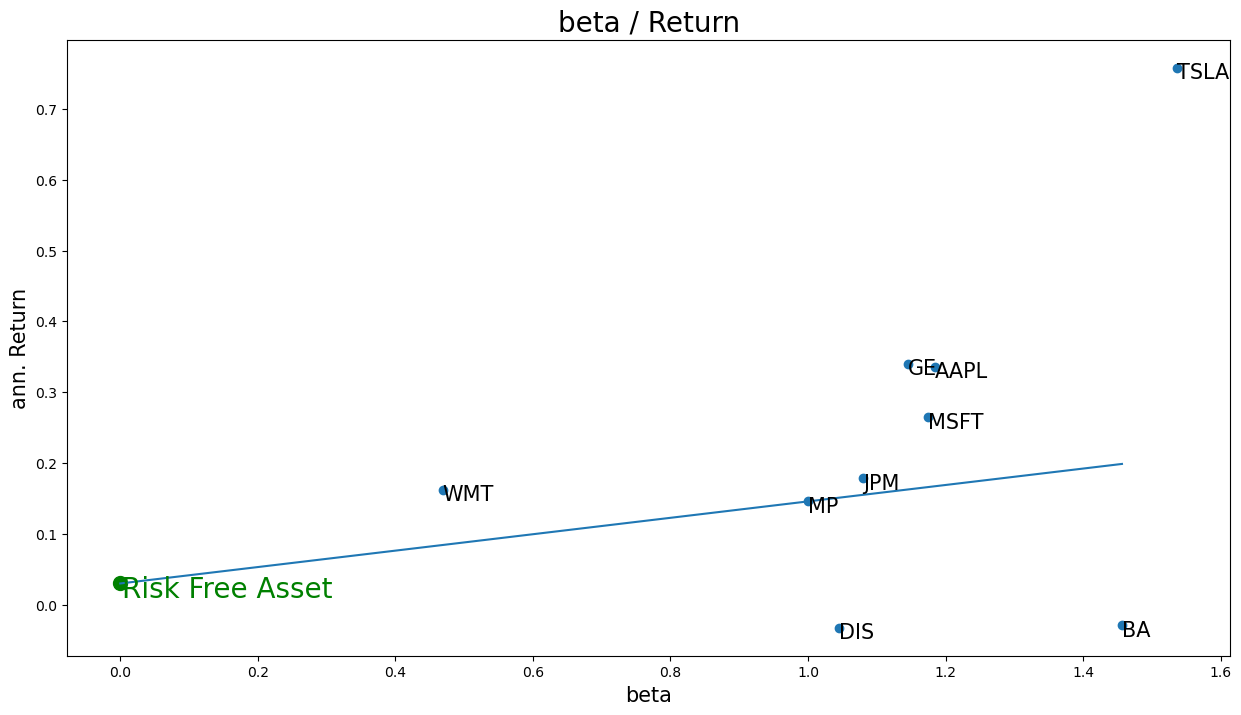

In [141]:
plt.figure(figsize = (15, 8))
plt.scatter(summary.beta, summary["ann. Return"])
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "beta"]+0.00, summary.loc[i, "ann. Return"]-0.015), size = 15)
plt.plot([rf[1], summary.loc["BA", "beta"]], [rf[0],rf[0] + summary.loc["BA", "beta"]*(summary.loc["MP", "ann. Return"] - rf[0])])
plt.scatter(rf[1], rf[0], s = 100, marker = "o", c = "green")
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.002, rf[0] - 0.02), size = 20, color = "green")
plt.xlabel("beta", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("beta / Return", fontsize = 20)
plt.show()

Positive Alpha: Overperformance -> underweighted in Market Portfolio <br>
Negative Alpha : Underperformance -> overweighted in Market Portfolio

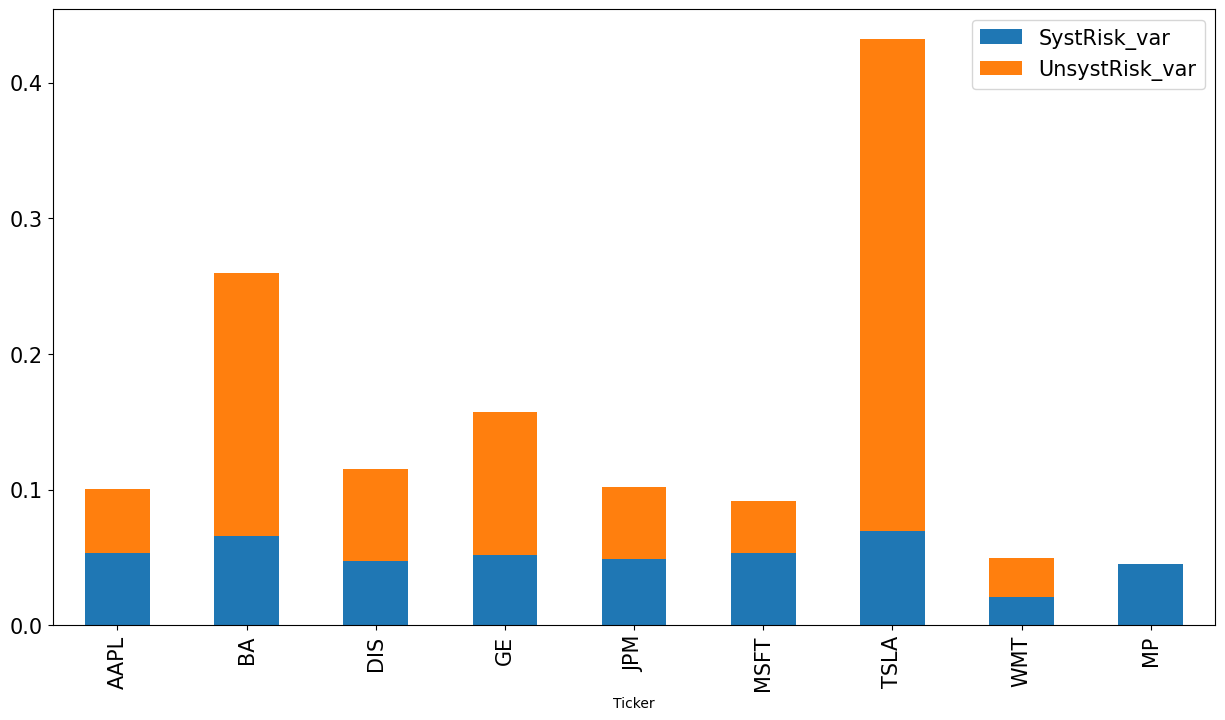

In [144]:
summary.iloc[:, 4:6].plot(kind = "bar", stacked = True, figsize= (15, 8), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

## More on Beta

__What is beta and how to interpret beta?__

In [149]:
import scipy.stats as stats

In [150]:
returns

Ticker,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT,MP
Date,,,,,,,,,
2019-09-10,0.0118,0.0299,-0.0219,0.0201,0.0127,-0.0105,0.0162,-0.0024,0.0003
2019-09-11,0.0318,0.0364,0.0029,0.0241,0.0027,0.0003,0.0491,-0.0003,0.0072
2019-09-12,-0.0022,-0.0191,0.0096,-0.0107,0.0061,0.0103,-0.0050,0.0078,0.0029
2019-09-13,-0.0195,0.0110,0.0038,0.0086,0.0197,-0.0015,-0.0027,0.0044,-0.0007
2019-09-16,0.0053,-0.0024,-0.0161,0.0043,-0.0089,-0.0072,-0.0097,-0.0158,-0.0031
...,...,...,...,...,...,...,...,...,...
2024-08-29,0.0146,0.0091,0.0036,0.0099,0.0042,0.0061,0.0026,0.0045,-0.0000
2024-08-30,-0.0034,0.0086,0.0063,0.0060,0.0117,0.0097,0.0380,0.0106,0.0101
2024-09-03,-0.0272,-0.0732,-0.0138,-0.0596,-0.0200,-0.0185,-0.0164,-0.0008,-0.0212


In [153]:
beta, intercept, rvalue, pvalue, stderr = stats.linregress(x = returns.MP, y = returns.AAPL)

In [154]:
beta

1.1846387317126856

In [155]:
summary

,ann. Risk,ann. Return,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var,beta,capm_ret,alpha
Ticker,,,,,,,,,
AAPL,0.3172,0.3361,0.9650,0.1006,0.0534,0.0472,1.1846,0.1673,0.1688
BA,0.5098,-0.0292,-0.1161,0.2599,0.0657,0.1942,1.4564,0.1988,-0.2280
DIS,0.3397,-0.0325,-0.1839,0.1154,0.0471,0.0683,1.0446,0.1510,-0.1835
GE,0.3968,0.3396,0.7802,0.1575,0.0516,0.1058,1.1448,0.1627,0.1770
JPM,0.3197,0.1783,0.4638,0.1022,0.0487,0.0535,1.0803,0.1552,0.0231
MSFT,0.3029,0.2644,0.7736,0.0918,0.0530,0.0388,1.1747,0.1661,0.0982
TSLA,0.6576,0.7581,1.1072,0.4325,0.0693,0.3632,1.5365,0.2080,0.5501
WMT,0.2230,0.1624,0.5938,0.0497,0.0211,0.0286,0.4687,0.0843,0.0781
MP,0.2124,0.1459,0.5456,0.0451,0.0451,-0.0000,1.0000,0.1459,0.0000


__Interpretation of beta__

- (beta = 1.5): If Market Return increases by 2%, the Stock´s Return is expected to increase by 3% (1.5 * 2)
- (beta = 0.5): If Market Return increases by 2%, the Stock´s Return is expected to increase by 1% (0.5 * 2)

__beta > 1:__

__Cyclical Stock__ (overreacting the market) -> Luxury Goods, __Consumer Discretionary__ (Cars, Leisure)

__beta < 1:__

__Non-Cyclical (defensive) Stock__ (underreacting the market) -> __Consumer Staples__ (Food, Clothing)

__Simple Investment Strategy__:
- Increase Portfolio beta in economic upswing
- Reduce Portfolio beta in economic downturn / recession 

## Forecasting Stock Returns with CAPM

__Idea: Ex-ante (forward-looking) all Stocks should be located on the Security Market Line (SML)__

__Implicit Assumptions__:
- Semi-strong EMH holds
- Homogeneous Expectations (market consensus)
- Investors act rationally

__Forward-looking CAPM:__

Exp. Return = RFR + (Exp. Market Portfolio Return  - RFR) * beta

- RFR: Short Term Treasury Bond/Note Rate
- Expected Market Return 
- beta Forecast

__Can we use past beta as an estimate for the future beta?__

In [192]:
returns

Ticker,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT,MP
Date,,,,,,,,,
2019-09-10,0.0118,0.0299,-0.0219,0.0201,0.0127,-0.0105,0.0162,-0.0024,0.0003
2019-09-11,0.0318,0.0364,0.0029,0.0241,0.0027,0.0003,0.0491,-0.0003,0.0072
2019-09-12,-0.0022,-0.0191,0.0096,-0.0107,0.0061,0.0103,-0.0050,0.0078,0.0029
2019-09-13,-0.0195,0.0110,0.0038,0.0086,0.0197,-0.0015,-0.0027,0.0044,-0.0007
2019-09-16,0.0053,-0.0024,-0.0161,0.0043,-0.0089,-0.0072,-0.0097,-0.0158,-0.0031
...,...,...,...,...,...,...,...,...,...
2024-08-29,0.0146,0.0091,0.0036,0.0099,0.0042,0.0061,0.0026,0.0045,-0.0000
2024-08-30,-0.0034,0.0086,0.0063,0.0060,0.0117,0.0097,0.0380,0.0106,0.0101
2024-09-03,-0.0272,-0.0732,-0.0138,-0.0596,-0.0200,-0.0185,-0.0164,-0.0008,-0.0212


__3Y Rolling Beta__

In [195]:
rolling_beta = returns.AAPL.rolling(3 * 252).cov(returns.MP) / returns.MP.rolling(3 * 252).var()
rolling_beta

Date
2019-09-10      NaN
2019-09-11      NaN
2019-09-12      NaN
2019-09-13      NaN
2019-09-16      NaN
              ...  
2024-08-29   1.2344
2024-08-30   1.2330
2024-09-03   1.2323
2024-09-04   1.2323
2024-09-05   1.2319
Length: 1256, dtype: float64

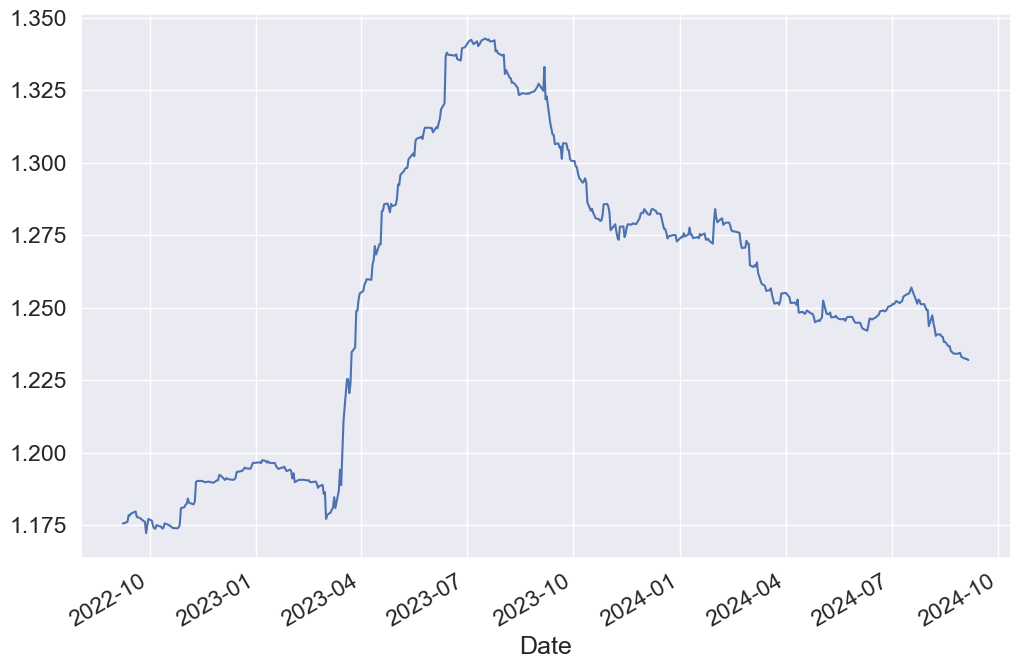

In [197]:
rolling_beta.plot(figsize = (12, 8))
plt.show()

- beta relatively stable over time
- past beta can be used as approx. for future beta

__Getting a stock´s beta from yahoo finance__

In [201]:
import yfinance as yf

In [203]:
ticker = yf.Ticker("AAPL")

In [205]:
info = ticker.get_info()
info

{'address1': 'One Apple Park Way',
 'city': 'Cupertino',
 'state': 'CA',
 'zip': '95014',
 'country': 'United States',
 'phone': '408 996 1010',
 'website': 'https://www.apple.com',
 'industry': 'Consumer Electronics',
 'industryKey': 'consumer-electronics',
 'industryDisp': 'Consumer Electronics',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and pod

In [207]:
beta = info["beta"] # based on 5Y monthly data
beta

1.239

__Getting RFR__

In [210]:
rfr = yf.download(tickers = "^IRX").Close.dropna().iloc[-1] / 100 #13 Week US Treasury Bill
rfr

[*********************100%%**********************]  1 of 1 completed


0.044650001525878905

__Market Return Estimate__

In [212]:
rm = 0.10 # market forecast
rm

0.1

__Stock Return Forecast with CAPM__

In [214]:
aapl_ret = rfr + (rm - rfr) * beta
aapl_ret

0.11322864963531495